### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=["EIN"], inplace=True)
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
appli_cat = application_df.dtypes.index.tolist()
application_df[appli_cat].nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [4]:
application_df.dtypes

NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [5]:
#Change datatypes ASK_AMT
application_df['ASK_AMT'] = application_df['ASK_AMT'].astype(str)

In [6]:
application_df.dtypes

NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                   object
IS_SUCCESSFUL              int64
dtype: object

In [7]:
# Look at APPLICATION_TYPE value counts for binning
application_df.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

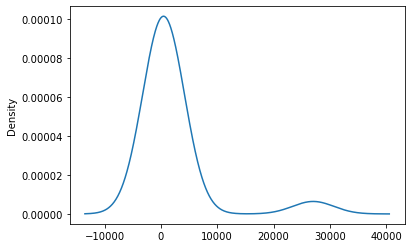

In [8]:
# Visualize the value counts of APPLICATION_TYPE
Ap = application_df.APPLICATION_TYPE.value_counts()
Ap.plot.density()

In [9]:
# Determine which values to replace if counts are less than ...?
replace_application = list(Ap[Ap < 200].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1245        1
C8210        1
C1248        1
C5200        1
C1900        1
Name: CLASSIFICATION, Length: 71, dtype: int64

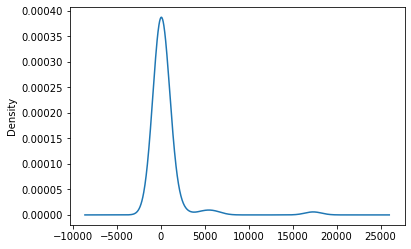

In [11]:
# Visualize the value counts of CLASSIFICATION
cla = application_df.CLASSIFICATION.value_counts()
cla.plot.density()

In [12]:
# Determine which values to replace if counts are less than ..?
replace_class = list(cla[cla < 300].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [13]:
# Look at NAME value counts for binning
application_df.NAME.value_counts()

PARENT BOOSTER USA INC                                       1260
TOPS CLUB INC                                                 765
UNITED STATES BOWLING CONGRESS INC                            700
WASHINGTON STATE UNIVERSITY                                   492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC               408
                                                             ... 
ENUMCLAW JUNIOR WRESTLING                                       1
UNITED STATES AIR FORCE SPACE & MISSILE MUSEUM FOUNDATION       1
URBAN AIR INITIATIVE INC                                        1
HAAP                                                            1
BRAZOS VALLEY T R O U P E                                       1
Name: NAME, Length: 19568, dtype: int64

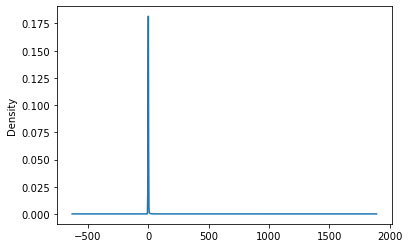

In [14]:
# Visualize the value counts of NAME
name = application_df.NAME.value_counts()
name.plot.density()

In [15]:
# Determine which values to replace if counts are less than ...?
replace_name = list(name[name < 50].index)

# Replace in dataframe
for app in replace_name:
    application_df.NAME = application_df.NAME.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

Other                                                                 24545
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGUE BASEBALL INC                                              277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                                266
MOMS CLUB   

In [16]:
# Look at ASK_AMT value counts for binning
application_df.ASK_AMT.value_counts()

5000       25398
10478          3
6725           3
15583          3
63981          3
           ...  
23149          1
2312243        1
13927          1
19738          1
1257590        1
Name: ASK_AMT, Length: 8747, dtype: int64

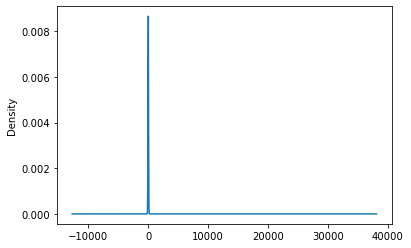

In [17]:
# Visualize the value counts of ASK_AMT
askamt = application_df.ASK_AMT.value_counts()
askamt.plot.density()

In [18]:
# Determine which values to replace if counts are less than ...?
replace_askamt = list(askamt[askamt < 3].index)

# Replace in dataframe
for app in replace_askamt:
    application_df.ASK_AMT = application_df.ASK_AMT.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.ASK_AMT.value_counts()

5000     25398
Other     8889
15583        3
63981        3
10478        3
6725         3
Name: ASK_AMT, dtype: int64

In [19]:
application_df.dtypes

NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                   object
IS_SUCCESSFUL              int64
dtype: object

In [20]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [21]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,NAME_AIR FORCE ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CALIFORNIA GARDEN CLUBS INC,NAME_CISD EDUCATIONAL SUPPORT GROUPS INC,NAME_CIVITAN INTERNATIONAL,NAME_CLEARCREEK I S D SUPPORT GROUPS,NAME_DEMOLAY INTERNATIONAL,...,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_10478,ASK_AMT_15583,ASK_AMT_5000,ASK_AMT_63981,ASK_AMT_6725,ASK_AMT_Other
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,IS_SUCCESSFUL,NAME_AIR FORCE ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CALIFORNIA GARDEN CLUBS INC,NAME_CISD EDUCATIONAL SUPPORT GROUPS INC,NAME_CIVITAN INTERNATIONAL,...,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_10478,ASK_AMT_15583,ASK_AMT_5000,ASK_AMT_63981,ASK_AMT_6725,ASK_AMT_Other
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [23]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [24]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [25]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 200
hidden_nodes_layer2 = 90
#hidden_nodes_layer3 = 40

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               20400     
_________________________________________________________________
dense_1 (Dense)              (None, 90)                18090     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 91        
Total params: 38,581
Trainable params: 38,581
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [27]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

In [29]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=500, callbacks=[cp_callback])

Epoch 1/500
804/804 [==============================] - 1s 1ms/step - loss: 0.4967 - accuracy: 0.7546
Epoch 2/500
153/804 [====>.........................] - ETA: 0s - loss: 0.4770 - accuracy: 0.7516
Epoch 00002: saving model to checkpoints\weights.02.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4795 - accuracy: 0.7632
Epoch 3/500
379/804 [=============>................] - ETA: 0s - loss: 0.4773 - accuracy: 0.7667
Epoch 00003: saving model to checkpoints\weights.03.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4751 - accuracy: 0.7672
Epoch 4/500
558/804 [===================>..........] - ETA: 0s - loss: 0.4729 - accuracy: 0.7665
Epoch 00004: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4734 - accuracy: 0.7676
Epoch 5/500
751/804 [===========================>..] - ETA: 0s - loss: 0.4738 - accuracy: 0.7663
Epoch 00005: saving model to checkpoints\weights.05.hdf5
804/804 [=======

434/804 [===============>..............] - ETA: 0s - loss: 0.4488 - accuracy: 0.7814
Epoch 00039: saving model to checkpoints\weights.39.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4572 - accuracy: 0.7762
Epoch 40/500
616/804 [=====================>........] - ETA: 0s - loss: 0.4550 - accuracy: 0.7780
Epoch 00040: saving model to checkpoints\weights.40.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4570 - accuracy: 0.7760
Epoch 41/500
804/804 [==============================] - 1s 1ms/step - loss: 0.4565 - accuracy: 0.7766
Epoch 42/500
  1/804 [..............................] - ETA: 0s - loss: 0.4400 - accuracy: 0.8125
Epoch 00042: saving model to checkpoints\weights.42.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4570 - accuracy: 0.7773
Epoch 43/500
201/804 [======>.......................] - ETA: 0s - loss: 0.4557 - accuracy: 0.7760
Epoch 00043: saving model to checkpoints\weights.43.hdf5
804/804 [===============

804/804 [==============================] - 1s 1ms/step - loss: 0.4520 - accuracy: 0.7773
Epoch 77/500
804/804 [==============================] - 1s 1ms/step - loss: 0.4527 - accuracy: 0.7775
Epoch 78/500
 46/804 [>.............................] - ETA: 0s - loss: 0.4584 - accuracy: 0.7724
Epoch 00078: saving model to checkpoints\weights.78.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4524 - accuracy: 0.7778
Epoch 79/500
270/804 [=========>....................] - ETA: 0s - loss: 0.4476 - accuracy: 0.7806
Epoch 00079: saving model to checkpoints\weights.79.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4520 - accuracy: 0.7787
Epoch 80/500
451/804 [===============>..............] - ETA: 0s - loss: 0.4532 - accuracy: 0.7755
Epoch 00080: saving model to checkpoints\weights.80.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4536 - accuracy: 0.7771
Epoch 81/500
634/804 [======================>.......] - ETA: 0s - loss: 0.453

804/804 [==============================] - 1s 1ms/step - loss: 0.4518 - accuracy: 0.7787
Epoch 115/500
338/804 [===========>..................] - ETA: 0s - loss: 0.4535 - accuracy: 0.7757
Epoch 00115: saving model to checkpoints\weights.115.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4517 - accuracy: 0.7783
Epoch 116/500
502/804 [=================>............] - ETA: 0s - loss: 0.4548 - accuracy: 0.7766
Epoch 00116: saving model to checkpoints\weights.116.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4508 - accuracy: 0.7786
Epoch 117/500
718/804 [=========================>....] - ETA: 0s - loss: 0.4497 - accuracy: 0.7793
Epoch 00117: saving model to checkpoints\weights.117.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4506 - accuracy: 0.7792
Epoch 118/500
804/804 [==============================] - 1s 1ms/step - loss: 0.4530 - accuracy: 0.7783
Epoch 119/500
122/804 [===>..........................] - ETA: 0s - los

569/804 [====================>.........] - ETA: 0s - loss: 0.4520 - accuracy: 0.7777
Epoch 00152: saving model to checkpoints\weights.152.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4511 - accuracy: 0.7787
Epoch 153/500
765/804 [===========================>..] - ETA: 0s - loss: 0.4517 - accuracy: 0.7768
Epoch 00153: saving model to checkpoints\weights.153.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4500 - accuracy: 0.7786
Epoch 154/500
804/804 [==============================] - 1s 1ms/step - loss: 0.4506 - accuracy: 0.7790
Epoch 155/500
180/804 [=====>........................] - ETA: 0s - loss: 0.4479 - accuracy: 0.7780
Epoch 00155: saving model to checkpoints\weights.155.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4509 - accuracy: 0.7787
Epoch 156/500
375/804 [============>.................] - ETA: 0s - loss: 0.4482 - accuracy: 0.7801
Epoch 00156: saving model to checkpoints\weights.156.hdf5
804/804 [=======

804/804 [==============================] - 1s 1ms/step - loss: 0.4513 - accuracy: 0.7785
Epoch 190/500
  1/804 [..............................] - ETA: 0s - loss: 0.4211 - accuracy: 0.8125
Epoch 00190: saving model to checkpoints\weights.190.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4515 - accuracy: 0.7792
Epoch 191/500
232/804 [=======>......................] - ETA: 0s - loss: 0.4525 - accuracy: 0.7773
Epoch 00191: saving model to checkpoints\weights.191.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4521 - accuracy: 0.7788
Epoch 192/500
435/804 [===============>..............] - ETA: 0s - loss: 0.4533 - accuracy: 0.7788
Epoch 00192: saving model to checkpoints\weights.192.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4511 - accuracy: 0.7792
Epoch 193/500
615/804 [=====================>........] - ETA: 0s - loss: 0.4479 - accuracy: 0.7793
Epoch 00193: saving model to checkpoints\weights.193.hdf5
804/804 [=======

281/804 [=========>....................] - ETA: 0s - loss: 0.4437 - accuracy: 0.7831
Epoch 00227: saving model to checkpoints\weights.227.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.4493 - accuracy: 0.7787
Epoch 228/500
481/804 [================>.............] - ETA: 0s - loss: 0.4536 - accuracy: 0.7820
Epoch 00228: saving model to checkpoints\weights.228.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4541 - accuracy: 0.7790
Epoch 229/500
682/804 [========================>.....] - ETA: 0s - loss: 0.4473 - accuracy: 0.7807
Epoch 00229: saving model to checkpoints\weights.229.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4488 - accuracy: 0.7790
Epoch 230/500
804/804 [==============================] - 1s 1ms/step - loss: 0.4487 - accuracy: 0.7788
Epoch 231/500
 47/804 [>.............................] - ETA: 0s - loss: 0.4457 - accuracy: 0.7799
Epoch 00231: saving model to checkpoints\weights.231.hdf5
804/804 [=======

543/804 [===================>..........] - ETA: 0s - loss: 0.4528 - accuracy: 0.7757
Epoch 00264: saving model to checkpoints\weights.264.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4499 - accuracy: 0.7782
Epoch 265/500
710/804 [=========================>....] - ETA: 0s - loss: 0.4491 - accuracy: 0.7775
Epoch 00265: saving model to checkpoints\weights.265.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4493 - accuracy: 0.7781
Epoch 266/500
804/804 [==============================] - 1s 1ms/step - loss: 0.4497 - accuracy: 0.7794
Epoch 267/500
131/804 [===>..........................] - ETA: 0s - loss: 0.4467 - accuracy: 0.7774
Epoch 00267: saving model to checkpoints\weights.267.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4529 - accuracy: 0.7786
Epoch 268/500
331/804 [===========>..................] - ETA: 0s - loss: 0.4531 - accuracy: 0.7785
Epoch 00268: saving model to checkpoints\weights.268.hdf5
804/804 [=======

793/804 [============================>.] - ETA: 0s - loss: 0.4494 - accuracy: 0.7782
Epoch 00301: saving model to checkpoints\weights.301.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4493 - accuracy: 0.7784
Epoch 302/500
804/804 [==============================] - 1s 1ms/step - loss: 0.4494 - accuracy: 0.7787
Epoch 303/500
182/804 [=====>........................] - ETA: 0s - loss: 0.4410 - accuracy: 0.7873
Epoch 00303: saving model to checkpoints\weights.303.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4492 - accuracy: 0.7791
Epoch 304/500
363/804 [============>.................] - ETA: 0s - loss: 0.4541 - accuracy: 0.7766
Epoch 00304: saving model to checkpoints\weights.304.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.4529 - accuracy: 0.7790
Epoch 305/500
567/804 [====================>.........] - ETA: 0s - loss: 0.4494 - accuracy: 0.7806
Epoch 00305: saving model to checkpoints\weights.305.hdf5
804/804 [=======

222/804 [=======>......................] - ETA: 0s - loss: 0.4495 - accuracy: 0.7786
Epoch 00339: saving model to checkpoints\weights.339.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4482 - accuracy: 0.7799
Epoch 340/500
443/804 [===============>..............] - ETA: 0s - loss: 0.4512 - accuracy: 0.7786
Epoch 00340: saving model to checkpoints\weights.340.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4482 - accuracy: 0.7791
Epoch 341/500
617/804 [======================>.......] - ETA: 0s - loss: 0.4491 - accuracy: 0.7785
Epoch 00341: saving model to checkpoints\weights.341.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4486 - accuracy: 0.7789
Epoch 342/500
804/804 [==============================] - 1s 1ms/step - loss: 0.4486 - accuracy: 0.7788
Epoch 343/500
  1/804 [..............................] - ETA: 0s - loss: 0.5163 - accuracy: 0.6562
Epoch 00343: saving model to checkpoints\weights.343.hdf5
804/804 [=======

804/804 [==============================] - 1s 1ms/step - loss: 0.4498 - accuracy: 0.7787
Epoch 377/500
682/804 [========================>.....] - ETA: 0s - loss: 0.4482 - accuracy: 0.7797
Epoch 00377: saving model to checkpoints\weights.377.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4488 - accuracy: 0.7792
Epoch 378/500
804/804 [==============================] - 1s 1ms/step - loss: 0.4491 - accuracy: 0.7794
Epoch 379/500
 45/804 [>.............................] - ETA: 0s - loss: 0.4634 - accuracy: 0.7590
Epoch 00379: saving model to checkpoints\weights.379.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4484 - accuracy: 0.7799
Epoch 380/500
278/804 [=========>....................] - ETA: 0s - loss: 0.4487 - accuracy: 0.7753
Epoch 00380: saving model to checkpoints\weights.380.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4490 - accuracy: 0.7787
Epoch 381/500
430/804 [===============>..............] - ETA: 0s - los

804/804 [==============================] - 1s 1ms/step - loss: 0.4485 - accuracy: 0.7794
Epoch 414/500
804/804 [==============================] - 1s 1ms/step - loss: 0.4495 - accuracy: 0.7796
Epoch 415/500
139/804 [====>.........................] - ETA: 0s - loss: 0.4504 - accuracy: 0.7779
Epoch 00415: saving model to checkpoints\weights.415.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4487 - accuracy: 0.7795
Epoch 416/500
300/804 [==========>...................] - ETA: 0s - loss: 0.4486 - accuracy: 0.7749
Epoch 00416: saving model to checkpoints\weights.416.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4488 - accuracy: 0.7789
Epoch 417/500
489/804 [=================>............] - ETA: 0s - loss: 0.4488 - accuracy: 0.7777
Epoch 00417: saving model to checkpoints\weights.417.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4485 - accuracy: 0.7793
Epoch 418/500
692/804 [========================>.....] - ETA: 0s - los

Epoch 00451: saving model to checkpoints\weights.451.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4486 - accuracy: 0.7790
Epoch 452/500
364/804 [============>.................] - ETA: 0s - loss: 0.4473 - accuracy: 0.7800
Epoch 00452: saving model to checkpoints\weights.452.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4490 - accuracy: 0.7792
Epoch 453/500
581/804 [====================>.........] - ETA: 0s - loss: 0.4505 - accuracy: 0.7777
Epoch 00453: saving model to checkpoints\weights.453.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4493 - accuracy: 0.7791
Epoch 454/500
779/804 [============================>.] - ETA: 0s - loss: 0.4492 - accuracy: 0.7780
Epoch 00454: saving model to checkpoints\weights.454.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4483 - accuracy: 0.7788
Epoch 455/500
804/804 [==============================] - 1s 1ms/step - loss: 0.4489 - accuracy: 0.7791
Epoch 456/50

804/804 [==============================] - 1s 1ms/step - loss: 0.4484 - accuracy: 0.7794
Epoch 489/500
635/804 [======================>.......] - ETA: 0s - loss: 0.4479 - accuracy: 0.7796
Epoch 00489: saving model to checkpoints\weights.489.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4482 - accuracy: 0.7792
Epoch 490/500
804/804 [==============================] - 1s 1ms/step - loss: 0.4481 - accuracy: 0.7800
Epoch 491/500
  1/804 [..............................] - ETA: 0s - loss: 0.4703 - accuracy: 0.7500
Epoch 00491: saving model to checkpoints\weights.491.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4481 - accuracy: 0.7790
Epoch 492/500
225/804 [=======>......................] - ETA: 0s - loss: 0.4352 - accuracy: 0.7875
Epoch 00492: saving model to checkpoints\weights.492.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4490 - accuracy: 0.7794
Epoch 493/500
398/804 [=============>................] - ETA: 0s - los

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6089 - accuracy: 0.7630
Loss: 0.6089483499526978, Accuracy: 0.763032078742981


In [31]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")